### Problem Statement

- This project understand how student's performance is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

### Data Collection

- DataSource - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977
- The data consists of 8 column and 100 rows

### Importing Data and Required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head(n=10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.shape

(1000, 8)

### Dataset Description

- gender: sex of students -> (Male/female)
- race/ethnicity: ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education -> (bachelor's degree,some college, master's degree, associate's degree, highschool)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There is no missing values in the dataset

##### Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

- There is no duplicated values in the dataset

- if there is any use df.drop_duplicates()

##### Check Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Check Statistics of Dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight 

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

##### Exploring DataSet

In [34]:
categorical_variables = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_variables:
    print("Categories in {0} variable: ".format(col),end=" ")
    print(df[col].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


In [37]:
categorical_variables = [col for col in df.columns if df[col].dtype == 'object']
numerical_variables = [col for col in df.columns if df[col].dtype != 'object']

print('we have {0} numerical features : {1}'.format(len(numerical_variables),numerical_variables))
print('we have {0} categorical features : {1}'.format(len(categorical_variables),categorical_variables))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding Column for Total score and Average score

In [40]:
df['total_score'] = df['math_score'] + df['reading_score'] + df["writing_score"]
df["average"]     = df["total_score"]/3

In [41]:
df.head(n=6)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333


In [44]:
reading_full = df[df["reading_score"] == 100]['average'].count()
writing_full = df[df["writing_score"] == 100]['average'].count()
math_full = df[df["math_score"] == 100]['average'].count()

print(f"Number of student with full score in math are {math_full}")
print(f"Number of student with full score in reading are {reading_full}")
print(f"Number of student with full score in writing are {writing_full}")

Number of student with full score in math are 7
Number of student with full score in reading are 17
Number of student with full score in writing are 14


In [45]:
reading_less_20 = df[df["reading_score"] <= 20]['average'].count()
writing_less_20 = df[df["writing_score"] <= 20]['average'].count()
math_less_20    = df[df["math_score"] <= 20]['average'].count()

print(f"Number of student with less than 20 score in math are {math_less_20}")
print(f"Number of student with less than 20 in reading are {reading_less_20}")
print(f"Number of student with less than 20 in writing are {writing_less_20}")

Number of student with less than 20 score in math are 4
Number of student with less than 20 in reading are 1
Number of student with less than 20 in writing are 3


### Insight

- from above data full and less than 20, Student in math performed very low as comparison to reading and writing
- Best performance is in reading section

### Exploring Data (Visualization)

#### Visualize Avg Score Distribution

- Histogram 
- Kernel Distribution Function (KDE)

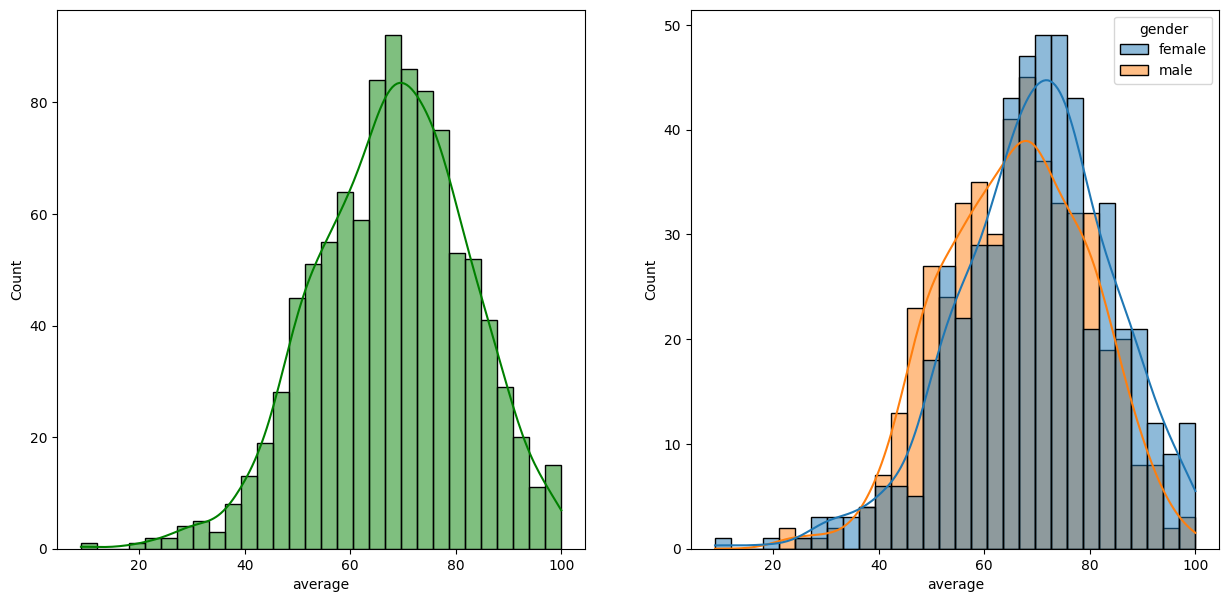

In [53]:
fig, axs = plt.subplots(1,2,figsize= (15,7))
plt.subplot(1,2,1)
snb.histplot(data=df, x='average',bins=30,kde=True, color='g')
plt.subplot(1,2,2)
snb.histplot(data=df, x='average',bins = 30, kde=True, hue = 'gender')
plt.show()

#### Insight 

- from average of males vs females, Female tend to perform better.

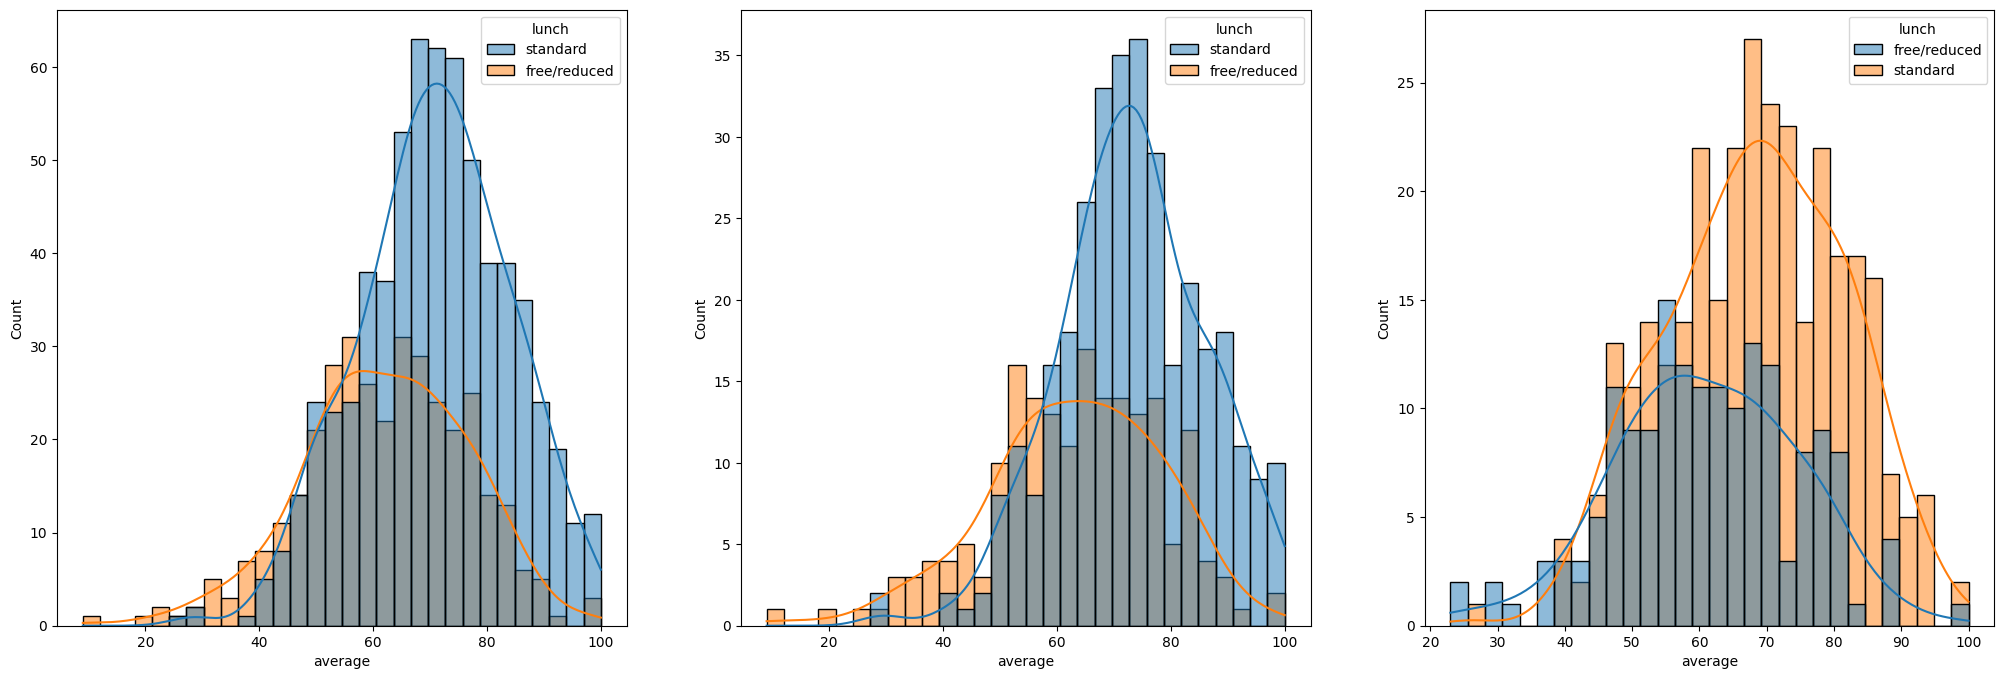

In [64]:
fig, axs = plt.subplots(1,3,figsize= (25,8))
plt.subplot(131)
snb.histplot(data=df, x='average', bins=30, kde=True, hue = 'lunch')
plt.subplot(132)
snb.histplot(data=df[df['gender'] == 'female'], x='average',bins = 30, kde=True, hue = 'lunch')
plt.subplot(133)
snb.histplot(data=df[df['gender'] == 'male'], x='average',bins = 30, kde=True, hue = 'lunch')
plt.show()

#### Insight 

- Standard lunch helps perform well in exam be it male or female (or Both)